In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Titanic.csv')


## Handling missing values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

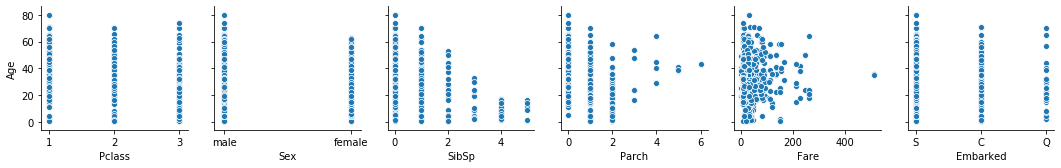

In [4]:
# analysing the relation of age with other variables to fill the missing values in age 
sns.pairplot(x_vars=['Pclass','Sex','SibSp','Parch','Fare','Embarked'],y_vars='Age',data=df)

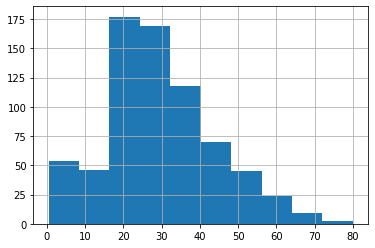

In [5]:
# only sibsp is affecting the age so we will analyse the distributio of age.
# if it is normally distributed then we will use mean or else median of age in relation sibsp
df['Age'].hist()

In [6]:
df.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


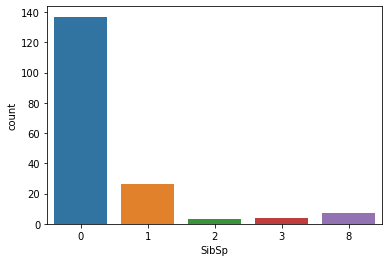

In [7]:
sns.countplot(x='SibSp',data=df[df["Age"].isnull()])

In [8]:
df['Age'].median()

28.0

In [9]:
df["Age"]=np.where ((df['SibSp']==8) & (df['Age'].isnull()),28.0,df["Age"])

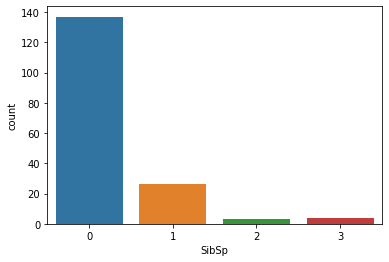

In [10]:
sns.countplot(x='SibSp',data=df[df["Age"].isnull()])

In [11]:
df["Age"]=np.where ((df['SibSp']==0) & (df['Age'].isnull()),29.0,df["Age"])
df["Age"]=np.where ((df['SibSp']==1) & (df['Age'].isnull()),30.0,df["Age"])
df["Age"]=np.where ((df['SibSp']==2) & (df['Age'].isnull()),23.0,df["Age"])
df["Age"]=np.where ((df['SibSp']==3) & (df['Age'].isnull()),9.5,df["Age"])

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Embarked'].mode()

0    S
dtype: object

In [14]:
df['Embarked'].fillna('S',inplace=True)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
## droping these as these are not making any impact on survive

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# outlier handling

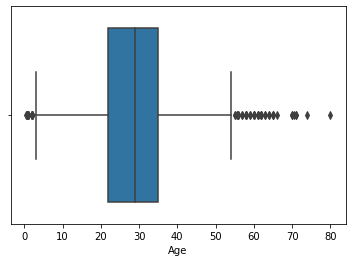

In [18]:
sns.boxplot(df["Age"])

In [19]:
## use later on capping on age for treating outlier

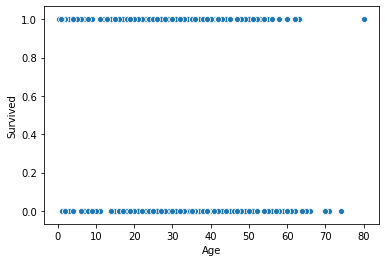

In [20]:
sns.scatterplot('Age','Survived',data=df)
# no relation between age and survive thus no need to remove the outliers 

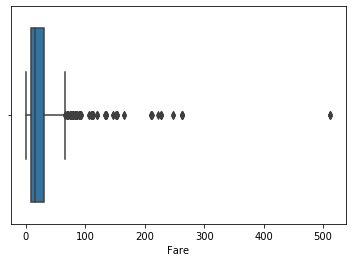

In [21]:
sns.boxplot(df['Fare'])

In [22]:
## removing only rows with value above 500 fare
df.sort_values(by='Fare',ascending=False)[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
311,1,1,female,18.0,2,2,262.3750,C
742,1,1,female,21.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C


In [23]:
df.drop(df[df['Fare']>500].index,inplace=True)

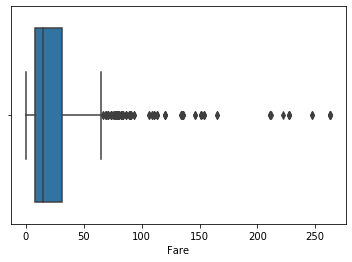

In [24]:
sns.boxplot(df['Fare'])
# we can do the treatment of other outliers but now we are moving forwarding for logistic regression 

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
numerical_cols=df.select_dtypes(include=[np.number]).columns

In [27]:
numerical_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [28]:
titanic_number=df[numerical_cols]

# create dummy variable for character data

In [29]:
character_cols=df.select_dtypes(include='object').columns

In [30]:
character_cols

Index(['Sex', 'Embarked'], dtype='object')

In [31]:
titanic_dummies=pd.get_dummies(df[character_cols])

In [32]:
titanic_dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


# combining numerical and dummy variables 

In [33]:
titanic_combined=pd.concat([titanic_number,titanic_dummies],axis=1)

In [34]:
titanic_combined

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,30.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [35]:
titanic_combined.drop(columns=['Sex_male','Embarked_C'],axis=1,inplace=True)

In [36]:
titanic_combined.shape

(888, 9)

In [37]:
X=titanic_combined.drop(columns=['Survived'])
Y=titanic_combined['Survived']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [39]:
X_train.shape

(666, 8)

In [40]:
X_test.shape

(222, 8)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
# classifier used for sigmoid function

C:\Users\Rohit Charaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
Y_pred=classifier.predict(X_test)

In [43]:
Y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

# Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
# if you give Y_pred then output will be like 1 0 like here 32 is false positive and 21 is false negative.
                                            

[[110  21]
 [ 32  59]]


In [45]:
from sklearn.metrics import accuracy_score 
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)
# 

0.7612612612612613


## Area under ROC curve

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
area_under_roc=roc_auc_score(Y_test,Y_pred)
print(area_under_roc)
# higher the probability, better it is 

0.744023152420099


# plotting the ROC curve

In [48]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,classifier.predict_proba(X_test)[:,1])

In [49]:
classifier.predict_proba(X_test)

array([[0.30335789, 0.69664211],
       [0.90416049, 0.09583951],
       [0.18592382, 0.81407618],
       [0.91453456, 0.08546544],
       [0.67828824, 0.32171176],
       [0.77251525, 0.22748475],
       [0.76245013, 0.23754987],
       [0.05084124, 0.94915876],
       [0.42140533, 0.57859467],
       [0.71052239, 0.28947761],
       [0.92851055, 0.07148945],
       [0.06593242, 0.93406758],
       [0.28881306, 0.71118694],
       [0.71198838, 0.28801162],
       [0.27324966, 0.72675034],
       [0.91666257, 0.08333743],
       [0.43019434, 0.56980566],
       [0.48211087, 0.51788913],
       [0.85991672, 0.14008328],
       [0.06303542, 0.93696458],
       [0.68996882, 0.31003118],
       [0.05988639, 0.94011361],
       [0.61502366, 0.38497634],
       [0.74313184, 0.25686816],
       [0.03680259, 0.96319741],
       [0.84783523, 0.15216477],
       [0.35586215, 0.64413785],
       [0.55403886, 0.44596114],
       [0.61508981, 0.38491019],
       [0.744685  , 0.255315  ],
       [0.

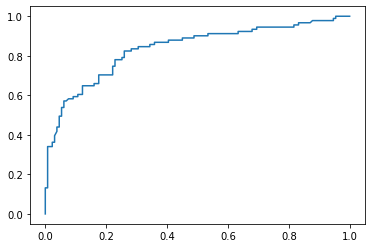

In [50]:
plt.plot(fpr,tpr)

In [51]:
type(pd.Series(thresholds))

fpr_series=pd.Series(fpr)
tpr_series=pd.Series(tpr)
thresholds_series=pd.Series(thresholds)

df=pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
df.sort_values(by='TPR',ascending=False)

,FPR,TPR,THRESHOLD
77,1.000000,1.000000,0.049305
76,0.954198,1.000000,0.059376
75,0.954198,0.989011,0.059627
74,0.946565,0.989011,0.061185
73,0.946565,0.978022,0.064938
...,...,...,...
5,0.022901,0.340659,0.774955
2,0.000000,0.131868,0.924588
3,0.007634,0.131868,0.914168
1,0.000000,0.010989,0.963197


In [56]:
from sklearn.metrics import classification_report 



print(cm) 
print ('Accuracy Score :',accuracy)
print ('Report : ')
m=classification_report(y_test,y_pred) 
print('classification report:',m)

[[110  21]
 [ 32  59]]
Accuracy Score : 0.7612612612612613
Report : 


NameError: name 'y_test' is not defined